<a href="https://colab.research.google.com/github/Valtern/machinelearningsmt5/blob/main/TG7_2341720067_ANTONIUS_KAHARAP_KAUTSAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1

In [2]:
import google.colab.drive

google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import Library
!pip install annoy

import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551806 sha256=c0bab455b607a346fdd3ac85eb4e26413fb225d86b21fc429d502a648e2ca373
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [5]:
# Build Random Dataset and Query Point
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # random value at 100x100 space

# Query point (pick 1 random data point)
query = X[np.random.randint(0, n_points)]

In [6]:
# Compute Exact NN Using Brute Force
# It will visit the data one by one
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 13.8135 ms


In [8]:
# ANNOY 3 Tree
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # find 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")


Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.1469 ms


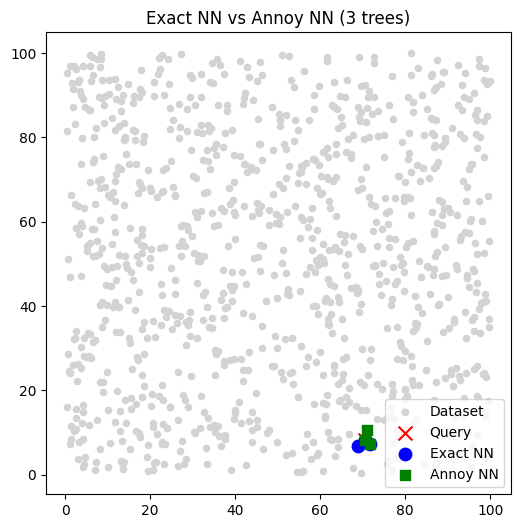

In [9]:
# Visualize
# Knowing the NN produced by Exact NN and ANNOY
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

# Lab 2

In [11]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 49.9 MB/s eta 0:00:00


In [12]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

In [13]:
# Build random data
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 data 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query point

In [14]:
# Search NN using Exact NN
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

# Compute Exact NN Time
start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # Find 3 NN
end = time.time()
time_flat = end - start

In [15]:
# Compute FAISS
nlist = 10   # n-cluster (inverted list)
m = 2        # number of subvector
quantizer = faiss.IndexFlatL2(2)   # used by IVF for initiatl cluster
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

In [16]:
# Print The Peformances
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.00026035308837890625
Waktu IVF+PQ: 0.0002887248992919922


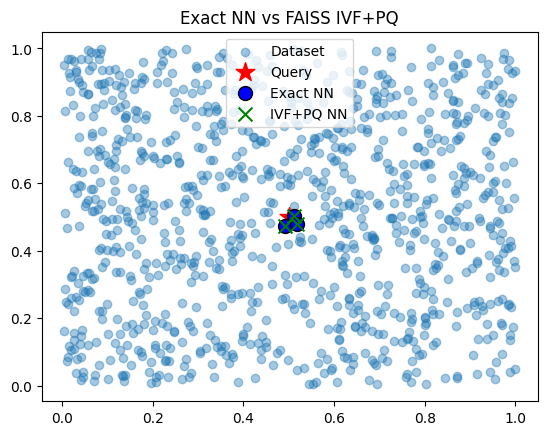

In [17]:
# Visualize
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Flat NN -> Exact NN
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# IVF+PQ NN -> FAISS
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Exact NN vs FAISS IVF+PQ")
plt.show()

# Lab 3

In [18]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528144 sha256=25ae3973a95bf515a3324a2decaac212b745e61022fc94fb3ce864e98f914157
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


In [19]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

In [20]:
# Build Dummy Dataset
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

In [21]:
# Build NN Model
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

# Compute time performace
start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "s")

=== Exact NN ===
Indices: [[830 247 473 913 592]]
Distances: [[0.00993625 0.01363944 0.01646171 0.03779694 0.03859071]]
Waktu: 0.04649209976196289 s


In [22]:
# Initiate Index
p = hnswlib.Index(space='l2', dim=dim)

# Define Max Elements
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Add Data
p.add_items(data)

# Set searching parameter
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "s")


=== HNSW ===
Indices: [[830 247 473 913 592]]
Distances: [[9.8728990e-05 1.8603441e-04 2.7098786e-04 1.4286089e-03 1.4892431e-03]]
Waktu: 0.00016450881958007812 s


# Lab 4

In [24]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# Build 1mio rows with 5D
# ===============================
n_data = 1_000_000   # try 100_000 if you have limited memory
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")

=== Annoy ===
Build time: 27.828718423843384 detik
Query time: 0.0002181529998779297 detik
Neighbors: [473142, 815660, 216089, 418503, 261601] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.014655828475952148 detik
Query time: 0.006380796432495117 detik
Neighbors: [473142 815660 216089 418503 261601] ...

=== HNSW (hnswlib) ===
Build time: 187.86114406585693 detik
Query time: 0.00025010108947753906 detik
Neighbors: [473142 815660 216089 418503 261601] ...


**Lab 5**

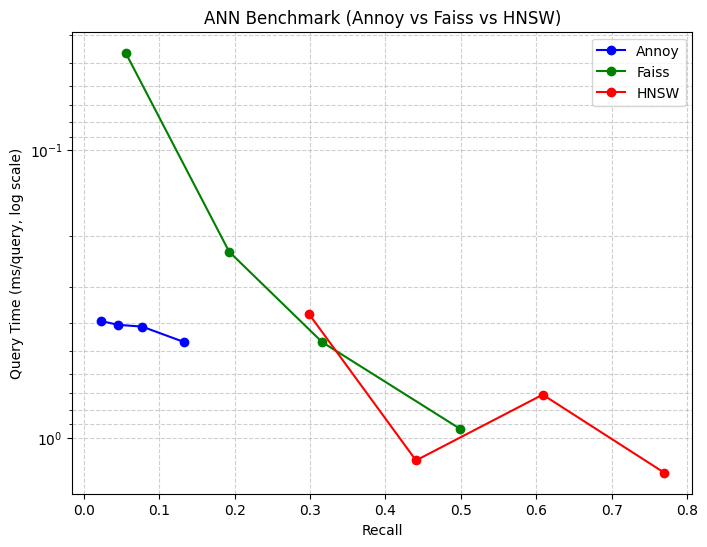

In [1]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

# Lab Assignment 1

Perform model performance comparison using ANNOY, FAISS, and HNWH using this following criteria, and fill the performance in term of time of execution.

<table><thead><tr><th width="263.32421875">Criteria (Rows/Dimension)</th><th>ANNOY</th><th>FAISS</th><th>HNSW</th></tr></thead><tbody><tr><td>1000/2D</td><td></td><td></td><td></td></tr><tr><td>1000/5D</td><td></td><td></td><td></td></tr><tr><td>1000000/2D</td><td></td><td></td><td></td></tr><tr><td>1000000/5D</td><td></td><td></td><td></td></tr></tbody></table>

**ANNOY**

1000 Data

In [3]:
np.random.seed(22)
n_points = 1000
X = np.random.rand(n_points, 2) * 100

query = X[np.random.randint(0, n_points)]

f = 2
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN distance:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Annoy time for 1000/2D:", round(time_ann*1000, 4), "ms")


Annoy NN index: [203, 504, 57]
Annoy NN distance: [np.float64(0.0), np.float64(3.1945648957687443), np.float64(3.867650052284535)]
Annoy time for 1000/2D: 0.1245 ms


In [5]:
np.random.seed(22)
n_points = 1000
X = np.random.rand(n_points, 5) * 100

query = X[np.random.randint(0, n_points)]

f = 5
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN distance:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Annoy time for 1000/5D:", round(time_ann*1000, 4), "ms")


Annoy NN index: [554, 472, 453]
Annoy NN distance: [np.float64(0.0), np.float64(13.526505778795586), np.float64(15.576697884696678)]
Annoy time for 1000/5D: 0.1426 ms


1000000 Data

In [8]:
np.random.seed(22)
n_points = 1000000
X = np.random.rand(n_points, 2).astype(np.float32) * 100

query = X[np.random.randint(0, n_points)]

f = 2
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(10)

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN distance:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Annoy time for 1000000/2D:", round(time_ann*1000, 4), "ms")


Annoy NN index: [504260, 833615, 896892]
Annoy NN distance: [np.float32(0.0), np.float32(0.022583695), np.float32(0.058529418)]
Annoy time for 1000000/2D: 0.2475 ms


In [9]:
np.random.seed(22)
n_points = 1000000
X = np.random.rand(n_points, 5).astype(np.float32) * 100

query = X[np.random.randint(0, n_points)]

f = 5
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(10)

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN distance:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Annoy time for 1000000/5D:", round(time_ann*1000, 4), "ms")


Annoy NN index: [424652, 620849, 144402]
Annoy NN distance: [np.float32(0.0), np.float32(5.752228), np.float32(6.42858)]
Annoy time for 1000000/5D: 0.2294 ms


**FAISS**

1000 Data

In [10]:
np.random.seed(22)
X = np.random.rand(1000, 2).astype('float32')
query = np.array([[0.5, 0.5]], dtype='float32')

In [11]:
nlist = 10
m = 2
quantizer = faiss.IndexFlatL2(2)
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)

index_ivfpq.train(X)
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

In [14]:
print("Time for FAISS 1000/2d:", time_ivfpq)

Time for FAISS 1000/2d: 0.00859975814819336


In [24]:
dim = 5
n_points = 1000
X = np.random.rand(n_points, dim).astype('float32')

query = X[np.random.randint(0, n_points)].reshape(1, -1)

nlist = 10
m = 5
quantizer = faiss.IndexFlatL2(dim)
index_ivfpq = faiss.IndexIVFPQ(quantizer, dim, nlist, m, 8)


index_ivfpq.train(X)
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

print(f"FAISS Query Time for 1000/5D: {time_ivfpq * 1000:.4f} ms")

FAISS Query Time for 1000/5D: 0.1907 ms


1000000 Data



In [25]:
np.random.seed(22)
X = np.random.rand(1000000, 2).astype('float32')
query = np.array([[0.5, 0.5]], dtype='float32')

nlist = 10
m = 2
quantizer = faiss.IndexFlatL2(2)
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)

index_ivfpq.train(X)
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

print("Time for FAISS 1000000/2D:", time_ivfpq)

Time for FAISS 1000000/2d: 0.0007762908935546875


In [27]:
dim = 5
n_points = 1000000
X = np.random.rand(n_points, dim).astype('float32')

query = X[np.random.randint(0, n_points)].reshape(1, -1)

nlist = 10
m = 5
quantizer = faiss.IndexFlatL2(dim)
index_ivfpq = faiss.IndexIVFPQ(quantizer, dim, nlist, m, 8)


index_ivfpq.train(X)
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

print(f"Time for FAISS 1000000/5D: {time_ivfpq * 1000:.4f} ms")

Time for FAISS 1000000/5D: 5.9488 ms


**HNSW**

1000 Data

In [28]:

num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)


query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5


p = hnswlib.Index(space='l2', dim=dim)


p.init_index(max_elements=num_elements, ef_construction=100, M=16)


p.add_items(data)

p.set_ef(50)

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Time for 1000/2D:", end - start, "s")


=== HNSW ===
Time for 1000/2D: 0.00048542022705078125 s


In [30]:

num_elements = 1000
dim = 5
data = np.random.random((num_elements, dim)).astype(np.float32)


query = np.random.random((1, dim)).astype(np.float32)
k = 5


p = hnswlib.Index(space='l2', dim=dim)


p.init_index(max_elements=num_elements, ef_construction=100, M=16)


p.add_items(data)

p.set_ef(50)

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Time for 1000/5D:", end - start, "s")


=== HNSW ===
Time for 1000/5D: 0.0002868175506591797 s


1000000 Data

In [33]:
num_elements = 1000000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)


query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5


p = hnswlib.Index(space='l2', dim=dim)


p.init_index(max_elements=num_elements, ef_construction=100, M=16)


p.add_items(data)

p.set_ef(50)

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Time for 1000000/2D:", end - start, "s")


=== HNSW ===
Time for 1000000/2D: 0.000213623046875 s


In [32]:

num_elements = 1000000
dim = 5
data = np.random.random((num_elements, dim)).astype(np.float32)


query = np.random.random((1, dim)).astype(np.float32)
k = 5


p = hnswlib.Index(space='l2', dim=dim)


p.init_index(max_elements=num_elements, ef_construction=100, M=16)


p.add_items(data)

p.set_ef(50)

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Time for 1000000/5D:", end - start, "s")


=== HNSW ===
Time for 1000000/5D: 0.0002734661102294922 s


# Lab assignment 2

Conduct an experiment using Annoy, FAISS, and HNSWLIB on a large secondary dataset (Micro Spotify) available at the following link:
👉 https://www.kaggle.com/datasets/bwandowando/spotify-songs-with-attributes-and-lyrics/data

1. Download the data and load the CSV file (select the first dataset of the two available).

2. Select only the numerical features, and normalize them using StandardScaler.

3. Perform nearest track search and compare the results.

4. Compare the performance among Exact NN, Annoy, FAISS, and HNSW.

In [ ]:
import pandas as pd
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv('/content/drive/MyDrive/MLearning/songs_with_attributes_and_lyrics.csv')  # ganti path sesuai lokasi file
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features].values

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors